In [1]:
#using Revise
using ITensors,ITensorMPS
#push!(LOAD_PATH,"../src/")
using RandomMeas
using ProgressBars

In [2]:
N  = 10
χ = 2^(N÷2)
ξ = siteinds("Qubit", N)
ψ = randomMPS(ξ; linkdims=χ);

In [3]:
p = zeros(N)
for NA in 1:N
    spec = get_spectrum(ψ,NA)
    p[NA] = get_moment(spec,2)[1]
end
#Print purities
@show p;

p = [0.5017999520623012, 0.2763119963534006, 0.16608613755731383, 0.1086598958490334, 0.07613925813882963, 0.08536881047080899, 0.1388882469424285, 0.2544849793291939, 0.5012392085292191, 1.0000000000000009]


In [4]:
#Perform Randomized measurements
nu=100
NM=100
data = zeros(Int8,(nu,NM,N))
for r in ProgressBar(1:nu, printing_delay=2)
    u = get_rotations(ξ,1) #Haar rotations in A
    data[r,:,:] = get_RandomMeas(ψ,u,NM)
end

0.0%┣                                             ┫ 0/100 [00:03<-4:-27, -3s/it]
1.0%┣▍                                         ┫ 1/100 [00:40<Inf:Inf, InfGs/it]
23.0%┣██████████▍                                  ┫ 23/100 [00:42<02:27, 2s/it]
53.0%┣███████████████████████▉                     ┫ 53/100 [00:44<00:40, 1it/s]
83.0%┣█████████████████████████████████████▍       ┫ 83/100 [00:46<00:10, 2it/s]
100.0%┣███████████████████████████████████████████┫ 100/100 [00:47<00:00, 2it/s]
100.0%┣███████████████████████████████████████████┫ 100/100 [00:47<00:00, 2it/s]


In [5]:
ps = zeros(N)
for NA in 1:N
        println(NA)
        ps[NA] = get_purity_hamming(data[:,:,1:NA],ξ[1:NA])
end
#print estimated purities
@show ps;

1
2
3
4
5
6
7
8
9
10
ps = [0.49799393939393904, 0.278678787878788, 0.1678606060606061, 0.12423030303030302, 0.07069696969696972, 0.08559999999999995, 0.16719393939393923, 0.24998181818181797, 0.62330303030303, 1.1181393939393935]


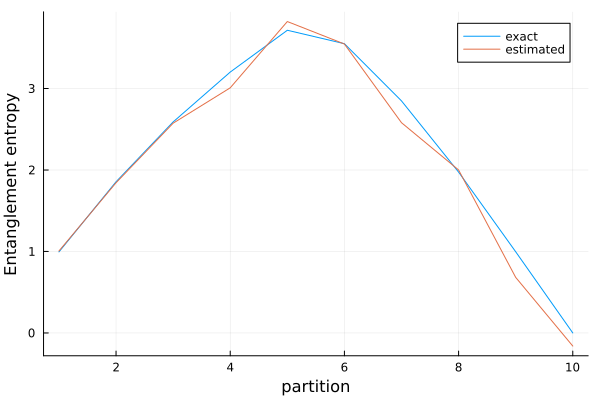

In [10]:
using Plots
Plots.plot(-log2.(p),label="exact")
Plots.plot!(-log2.(ps),label="estimated")
xlabel!("partition")
ylabel!("Entanglement entropy")
#legend()